In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('DEEP LEARNING').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
dataset=df.astype({'INPUT':'int'})
dataset=df.astype({'OUTPUT':'int'})
df.head()

,INPUT,OUTPUT
0,1,6
1,2,11
2,3,16
3,4,21
4,5,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   INPUT   20 non-null     object
 1   OUTPUT  20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [ ]:
df.describe()

,INPUT,OUTPUT
count,20,20
unique,20,20
top,1,6
freq,1,1


In [ ]:
x=dataset[['INPUT']].values

In [ ]:
x

array([['1'],
       ['2'],
       ['3'],
       ['4'],
       ['5'],
       ['6'],
       ['7'],
       ['8'],
       ['9'],
       ['10'],
       ['11'],
       ['12'],
       ['13'],
       ['14'],
       ['15'],
       ['16'],
       ['17'],
       ['18'],
       ['19'],
       ['20']], dtype=object)

In [ ]:
y=dataset[['OUTPUT']].values

In [ ]:
y

array([[  6],
       [ 11],
       [ 16],
       [ 21],
       [ 26],
       [ 31],
       [ 36],
       [ 41],
       [ 46],
       [ 51],
       [ 56],
       [ 61],
       [ 66],
       [ 71],
       [ 76],
       [ 81],
       [ 86],
       [ 91],
       [ 96],
       [101]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:
x_train.shape

(13, 1)

In [ ]:
x_test.shape

(7, 1)

In [ ]:
y_train.shape

(13, 1)

In [ ]:
y_test.shape

(7, 1)

In [ ]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train1=scaler.transform(x_train)

In [ ]:
learn=Sequential([
    Dense(units=9,activation='relu',input_shape = [1]),
    Dense(units=9,activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
learn.compile(optimizer='rmsprop',loss='mse')

In [ ]:
learn.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3360.0776
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 3356.4285
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3353.8579
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3351.7561
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3349.9255
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3348.2744
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 3346.7537
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3345.3254
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3343.9736
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3342.6909
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3341.4326
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 3340.1982
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3338.9548
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3337.6472
Epoch 15/2000
1/1 ━━━━━━━━━━━━

In [ ]:
loss_df=pd.DataFrame(learn.history.history)

<Axes: >

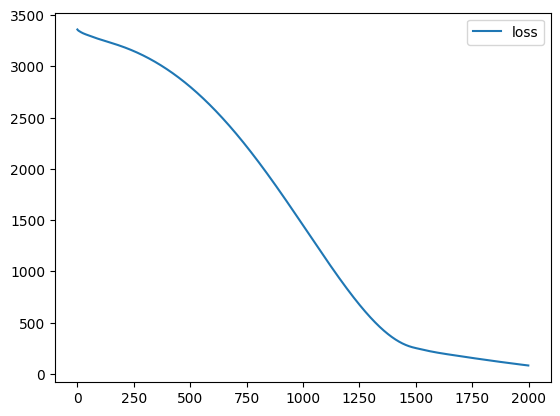

In [ ]:
loss_df.plot()

In [ ]:
x_test1=scaler.transform(x_test)

In [ ]:
learn.evaluate(x_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 93.7865


93.78648376464844

In [ ]:
x_n1=[[10]]

In [ ]:
x_n1_1=scaler.transform(x_n1)

In [ ]:
learn.predict(x_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[53.941795]], dtype=float32)